In [1173]:
# %matplotlib inline
# import matplotlib as mpl  # 기본 설정
# import matplotlib.pyplot as plt  # 그래프 그리기
# import matplotlib.font_manager as fm  # 폰트 관리

# !apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
# !apt-get install fonts-nanum* -qq #나눔글꼴 설치
# fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
# fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
# plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
# mpl.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 = TargetEncoder


In [1174]:
# prompt: 마운트

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1175]:
import datetime
#import nltk
import pandas as pd
import numpy as np
##import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
#주가데이터 가져오기

#모델 라이브러리
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.svm import SVC

#모델저장 라이브러리
import pickle
import os

In [1176]:
pd.set_option('display.max_rows', None)

In [1177]:
pd.reset_option('display.max_rows')

In [1178]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/KDT/최종프로젝트/0704_데이터_v003_지원한국제지대체2.xlsx')

In [1179]:
df.head()
# df = df.drop(columns=['N장애인고용률'])

,index,years,회사명,stock_code,전년도ESG,종합등급,매출액,영업이익,영업이익(발표기준),당기순이익,...,N남성 직원 수,N직원 수,N사외이사 수,N여성 정규직 수,N여성 직원 수,기업분류,상시근로자수,장애인고용의무인원,장애인근로자수,장애인고용률
0,2019-12-01,2019,동화약품,20,NaN,B,3072.0,96,96,91,...,NaN,NaN,0,0,0,5,NaN,NaN,NaN,NaN
1,2020-12-01,2020,동화약품,20,B,B,2721.0,232,232,287,...,2.0,2.0,2,3,3,5,NaN,NaN,NaN,NaN
2,2021-12-01,2021,동화약품,20,B,C,2930.0,225,225,196,...,2.0,2.0,2,3,3,5,NaN,NaN,NaN,NaN
3,2022-12-01,2022,동화약품,20,C,C,3404.0,299,299,216,...,2.0,2.0,2,3,3,5,NaN,NaN,NaN,NaN
4,2023-12-01,2023,동화약품,20,NaN,NaN,3611.0,188,188,282,...,2.0,2.0,2,3,3,4,NaN,NaN,NaN,NaN


In [1180]:
wage_increase_percentages_complete = {
    2019: 10.9,
    2020: 2.8,
    2021: 1.5,
    2022: 5.05,
    2023: 5.0
}
# 데이터프레임에 상승률 추가
df['wage_increase_percentage'] = df['years'].map(wage_increase_percentages_complete)

In [1181]:
df['장애인고용률'] = df['장애인고용률'].fillna(3.4)
df['장애인근로자수']=df['장애인근로자수'].fillna(df['직원 수']*0.03)

In [1182]:
#df = df.drop(columns=['기업규모','상시근로자수','장애인고용의무인원','장애인근로자수','장애인고용률'])
df = df.drop(columns=['기업규모','장애인고용의무인원','상시근로자수'])

In [1183]:
df.isnull().sum()

index                          0
years                          0
회사명                            0
stock_code                     0
전년도ESG                      1977
                            ... 
N여성 직원 수                       0
기업분류                           0
장애인근로자수                      682
장애인고용률                         0
wage_increase_percentage       0
Length: 86, dtype: int64

In [1184]:
df.columns

Index(['index', 'years', '회사명', 'stock_code', '전년도ESG', '종합등급', '매출액', '영업이익',
       '영업이익(발표기준)', '당기순이익', '지배주주순이익', '비지배주주순이익', '자산총계', '부채총계', '자본총계',
       '지배주주지분', '비지배주주지분', '자본금', '부채비율', '유보율', '영업이익률', '지배주주순이익률', 'ROA',
       'ROE', 'EPS(원)', 'BPS(원)', 'DPS(원)', 'PER', 'PBR', '발행주식수', '배당수익률',
       '지속가능경영 보고서공시여부', '매출액_상승률(퍼센트)', '영업이익_상승률', '배당수익률_상승률', '영업이익률_상승률',
       '이사의 수', '사외이사 수', '사외이사 비율', '녹색 기업 지정', '총 임원 수', '여성 임원 수 ',
       '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수', '남성 직원 수',
       '여성 직원 수', '직원 수', '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율', '여성 정규직 비율',
       '외국인 보유수량', '외국인 지분율', '시가총액', '상장주식수', '용수 사용량(Ton)', '에너지 총량(TJ)',
       '온실가스 배출총량(TonCo2eq)', '용수 사용량 등급', '에너지 총량 등급', '온실가스 배출총량 등급',
       'GICS_Sector', 'GICS_Industry', 'RE100', 'high_carbon', 'sbti', '자본비율',
       'N자산총계', 'N자본총계', 'N지배주주지분', 'N시가총액', 'N부채총계', 'N매출액', 'N남성 정규직 수',
       'N남성 직원 수', 'N직원 수', 'N사외이사 수', 'N여성 정규직 수', 'N여성 직원 수', '기업분류',
       '장애인근

In [1185]:
df['비지배주주순이익'] = df['비지배주주순이익'].fillna(0)

In [1186]:
df.describe()

,index,years,stock_code,매출액,영업이익,영업이익(발표기준),당기순이익,지배주주순이익,비지배주주순이익,자산총계,...,N남성 정규직 수,N남성 직원 수,N직원 수,N사외이사 수,N여성 정규직 수,N여성 직원 수,기업분류,장애인근로자수,장애인고용률,wage_increase_percentage
count,3985,3985.000000,3985.000000,3.980000e+03,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3.985000e+03,...,3247.000000,3247.000000,3247.000000,3985.000000,3985.000000,3985.000000,3985.000000,3303.000000,3985.000000,3985.000000
mean,2022-01-25 01:22:01.656210688,2021.155583,58406.890841,3.143882e+04,1791.389962,1797.847930,1282.274028,1159.045420,123.241154,4.632177e+04,...,1.496766,1.498922,1.499846,1.157089,1.496863,1.496612,4.255458,52.515471,3.197581,5.031280
min,2019-06-01 00:00:00,2019.000000,20.000000,2.200000e+01,-326552.000000,-326552.000000,-244291.000000,-244669.000000,-8041.000000,2.070000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.500000
25%,2020-12-01 00:00:00,2020.000000,5360.000000,1.836000e+03,19.000000,20.000000,-16.000000,-16.000000,0.000000,2.704000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.400000,2.800000
50%,2021-12-01 00:00:00,2021.000000,16790.000000,4.994000e+03,202.000000,203.000000,138.000000,129.000000,0.000000,6.153000e+03,...,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,5.000000,9.450000,3.400000,5.000000
75%,2022-12-01 00:00:00,2022.000000,80160.000000,1.542250e+04,838.000000,843.000000,582.000000,529.000000,11.000000,1.841000e+04,...,2.000000,3.000000,2.500000,2.000000,2.000000,2.000000,5.000000,26.700000,3.400000,5.050000
max,2023-12-01 00:00:00,2023.000000,383800.000000,3.022314e+06,516339.000000,516339.000000,556541.000000,547300.000000,37403.000000,4.559060e+06,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,7488.240000,3.400000,10.900000
std,NaN,1.421255,84016.444259,1.334972e+05,15508.675102,15516.976996,14329.528204,14029.505945,1029.860342,2.227592e+05,...,1.118615,1.119995,1.118895,1.133603,1.118955,1.120748,1.017165,283.196844,0.711636,3.047213


In [1187]:
df['EPS(원)'].describe()

count      3985.000000
mean       2465.084818
std       11619.690487
min     -128166.000000
25%         -48.000000
50%         498.000000
75%        2366.000000
max      284142.000000
Name: EPS(원), dtype: float64

In [1188]:
#df['PER'] = df.apply(lambda row: row['발행주식수'] / row['EPS(원)'] if pd.notna(row['EPS(원)']) and row['EPS(원)'] != 0 else None if pd.isna(row['PER']) else row['PER'], axis=1)
df['PER'].fillna(0, inplace=True)

In [1189]:
df['RE100'].fillna(0, inplace=True)

In [1190]:
#df.drop(columns=['RE100'], inplace=True)

In [1191]:
df['총 평균급여'] = (df['남성 평균 연봉'] * df['남성 정규직 수'] + df['여성 평균 연봉'] * df['여성 정규직 수'])
#df['정규직 비율'] = df['여성 정규직 비율'] * df['여성 직원 비율'] + df['남성 정규직 비율'] * df['남성 직원 비율']]
df['지배주주이익'] = df['당기순이익'] *df['지배주주지분']
#df['지배주주지분비율'] = df['지배주주지분'] / df['자본총계']
df['비지배주주이익'] = df['당기순이익'] *df['비지배주주지분']

In [1192]:
df['지배주주지분가치'] = df['지배주주지분'] * df['시가총액']

In [1193]:
# df['비지배주주지분가치'] = df['비지배주주지분'] * df['시가총액']

In [1194]:
"""
df['시가총액 대비 상장주식수 비율'] = df['시가총액'] / df['상장주식수']

df['외국인 지분금액']=df['외국인 지분율']*df['시가총액']

df['외국인 보유시가총액'] = df['외국인 보유수량'] / df['시가총액']
"""

"\ndf['시가총액 대비 상장주식수 비율'] = df['시가총액'] / df['상장주식수']\n\ndf['외국인 지분금액']=df['외국인 지분율']*df['시가총액']\n\ndf['외국인 보유시가총액'] = df['외국인 보유수량'] / df['시가총액']\n"

In [1195]:
#가장 높은 방식으로 60%
df['총임원수변화율'] = df.groupby(['회사명'], group_keys=False)['총 임원 수'].apply(lambda x: (x.diff()+1 / (x + 1)) * 100)
df['총임원수변화율'] = df['총임원수변화율'].fillna(1)


# 회사명을 기준으로 그룹화하고 직원변화율 계산
df['총직원수변화율'] = df.groupby(['회사명'],group_keys=False)['직원 수'].apply(lambda x: x.diff()+1 / (x+1) * 100)
df['총직원수변화율'] = df['총직원수변화율'].fillna(1)


df['총 평균급여변화율'] = df.groupby(['회사명'],group_keys=False)['총 평균급여'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 평균급여변화율'] = df['총 평균급여변화율'].fillna(1)

df['총 PBR변화율'] = df.groupby(['회사명'],group_keys=False)['PBR'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 PBR변화율'] = df['총 PBR변화율'].fillna(1)

df['총 자본총계변화율'] = df.groupby(['회사명'],group_keys=False)['자본총계'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 자본총계변화율'] = df['총 자본총계변화율'].fillna(1)

df['총 부채총계변화율'] = df.groupby(['회사명'],group_keys=False)['부채총계'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 부채총계변화율'] = df['총 부채총계변화율'].fillna(1)

df['총 외국인 보유수량변화율'] = df.groupby(['회사명'],group_keys=False)['외국인 보유수량'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 외국인 보유수량변화율'] = df['총 외국인 보유수량변화율'].fillna(1)

df['총 외국인 지분율변화율'] = df.groupby(['회사명'],group_keys=False)['외국인 지분율'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 외국인 지분율변화율'] = df['총 외국인 지분율변화율'].fillna(1)

df['총 시가총액변화율'] = df.groupby(['회사명'],group_keys=False)['시가총액'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 시가총액변화율'] = df['총 시가총액변화율'].fillna(1)


df['총 여성 임원 수변화율'] = df.groupby(['회사명'],group_keys=False)['여성 임원 수 '].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 여성 임원 수변화율'] = df['총 여성 임원 수변화율'].fillna(1)

df['총 외국인 보유수량변화율'] = df.groupby(['회사명'],group_keys=False)['외국인 보유수량'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 외국인 보유수량변화율'] = df['총 외국인 보유수량변화율'].fillna(1)

df['주가'] = df['시가총액'] / df['발행주식수']

df['총 주가변화율'] = df.groupby(['회사명'],group_keys=False)['주가'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 주가변화율'] = df['총 주가변화율'].fillna(1)


df = df.drop(columns=['주가'])
"""
df['총 여성 직원 수변화율'] = df.groupby(['회사명'],group_keys=False)['여성 직원 수'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 여성 직원 수변화율'] = df['총 여성 직원 수변화율'].fillna(1)


df['총 발행주식수변화율'] = df.groupby(['회사명'],group_keys=False)['발행주식수'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 발행주식수변화율'] = df['총 발행주식수변화율'].fillna(1)


df['총 BPS(원)변화율'] = df.groupby(['회사명'],group_keys=False)['BPS(원)'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 BPS(원)변화율'] = df['총 BPS(원)변화율'].fillna(df['BPS(원)'])
"""

"\ndf['총 여성 직원 수변화율'] = df.groupby(['회사명'],group_keys=False)['여성 직원 수'].apply(lambda x: (x.diff()+1) / (x+1) * 100)\ndf['총 여성 직원 수변화율'] = df['총 여성 직원 수변화율'].fillna(1)\n\n\ndf['총 발행주식수변화율'] = df.groupby(['회사명'],group_keys=False)['발행주식수'].apply(lambda x: (x.diff()+1) / (x+1) * 100)\ndf['총 발행주식수변화율'] = df['총 발행주식수변화율'].fillna(1)\n\n\ndf['총 BPS(원)변화율'] = df.groupby(['회사명'],group_keys=False)['BPS(원)'].apply(lambda x: (x.diff()+1) / (x+1) * 100)\ndf['총 BPS(원)변화율'] = df['총 BPS(원)변화율'].fillna(df['BPS(원)'])\n"

In [1196]:
df['총임원수변화율_abs']=df['총임원수변화율'].abs()

In [1197]:
# 2023 , 2019 년도 제거
df = df[(df['years'] != 2019) & (df['years'] != 2023)]

df = df.reset_index(drop=True)

In [1198]:
df['정규직비율'] = (df['남성 정규직 수'] + df['여성 정규직 수']) / (df['남성 직원 수'] + df['여성 직원 수'])
df[['정규직비율','여성 직원 수','여성 정규직 수']].describe()

,정규직비율,여성 직원 수,여성 정규직 수
count,2337.000000,2337.000000,2337.000000
mean,0.934897,446.408216,413.925973
std,0.105675,2443.626436,2416.571859
min,0.000000,0.000000,0.000000
25%,0.928144,19.000000,17.000000
50%,0.968504,58.000000,52.000000
75%,0.993395,220.000000,192.000000
max,1.000000,63686.000000,63450.000000


In [1199]:
df['종합등급'].value_counts()

종합등급
C     684
D     504
A     419
B+    384
B     340
A+     27
Name: count, dtype: int64

#### NEW

In [1200]:
# 시가총액*유보율
df['시가총액_유보율'] = df['시가총액'] * df['유보율']

# 임직원수
df['임직원수'] =  df['직원 수'] + df['총 임원 수']

df['조직의변화율'] = df.groupby(['회사명'], group_keys=False)['임직원수'].apply(lambda x: (x.diff()+1 / (x + 1)) * 100)
df['조직의변화율'] = df['조직의변화율'].fillna(1)

# 시가총액 * 배당수익률
df['시가총액_배당수익률'] = df['시가총액'] * df['배당수익률']

# 환경지표
df['환경지표'] = (df['에너지 총량 등급'] * df['온실가스 배출총량 등급'] * df['용수 사용량 등급']) / 3

# 효율성지표
df['효율성지표'] = df['매출액'] / df['자산총계']

# 임직원수 drop
df = df.drop(columns=['임직원수'])

# df['지속가능sbti'] = df['지속가능경영 보고서공시여부']+df['sbti']
# df['사외이사직원'] = df['N사외이사 수']*df['N직원 수']
# df['사외이사부채'] = df['N사외이사 수']*df['N부채총계']
# df['직원부채'] = df['N직원 수']*df['N부채총계']
# df['사외이사직원부채'] = df['N사외이사 수']*df['N직원 수']*df['N부채총계']
# df['외국인 지분율제곱'] = df['외국인 지분율']**2

# # 외국인 지분율 컬럼 제거
# df = df.drop(columns=['외국인 지분율'])

#### 변수 분포 확인

In [1201]:
# # 매출액, 시가총액의 분포 확인
# fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# # axes[0].hist(df['매출액'], bins=5)
# # axes[0].set_title('매출액 분포')

# # axes[1].hist(df['시가총액'], bins=5)
# # axes[1].set_title('시가총액 분포')

# # plt.tight_layout()
# # plt.show()

# # # 로그 변환 후 분포 확인
# # df['로그매출액'] = np.log(df['매출액'])
# # df['로그시가총액'] = np.log(df['시가총액'])

# # fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# # axes[0].hist(df['로그매출액'], bins=5)
# # axes[0].set_title('로그 매출액 분포')

# # axes[1].hist(df['로그시가총액'], bins=5)
# # axes[1].set_title('로그 시가총액 분포')

# # plt.tight_layout()
# # plt.show()

# # # 점 플롯으로 매출액과 시가총액 분포 나타내기
# # plt.figure(figsize=(8, 6))
# # plt.scatter(df['매출액'], df['시가총액'], color='b', marker='o', alpha=0.7)
# # plt.title('매출액 vs 시가총액')
# # plt.xlabel('매출액')
# # plt.ylabel('시가총액')
# # plt.grid(True)
# # plt.show()
# # 매출액의 scatter plot

# # 데이터를 매출액을 기준으로 오름차순 정렬
# df_sorted = df.sort_values(by='매출액')

# # 매출액의 scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(range(len(df_sorted['매출액'])), df_sorted['매출액'], color='b', marker='o', alpha=0.7)
# plt.title('매출액 분포 (오름차순 정렬)')
# plt.xlabel('데이터 인덱스 (정렬된 순서)')
# plt.ylabel('매출액')
# plt.grid(True)
# plt.show()

# # 데이터를 외국인 지분율을 기준으로 오름차순 정렬
# df_sorted = df.sort_values(by='외국인 지분율')

# # 외국인 지분율의 scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(range(len(df_sorted['외국인 지분율'])), df_sorted['외국인 지분율'], color='g', marker='o', alpha=0.7)
# plt.title('외국인 지분율 분포 (오름차순 정렬)')
# plt.xlabel('데이터 인덱스 (정렬된 순서)')
# plt.ylabel('외국인 지분율')
# plt.grid(True)
# plt.show()

# # 데이터를 용수 사용량(Ton)을 기준으로 오름차순 정렬
# df_sorted = df.sort_values(by='용수 사용량(Ton)')

# # 용수 사용량(Ton)의 scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(range(len(df_sorted['용수 사용량(Ton)'])), df_sorted['용수 사용량(Ton)'], color='g', marker='o', alpha=0.7)
# plt.title('용수 사용량(Ton) 분포 (오름차순 정렬)')
# plt.xlabel('데이터 인덱스 (정렬된 순서)')
# plt.ylabel('용수 사용량(Ton)')
# plt.grid(True)
# plt.show()

# # 데이터를 에너지 총량(TJ)을 기준으로 오름차순 정렬
# df_sorted = df.sort_values(by='에너지 총량(TJ)')

# # 에너지 총량(TJ)의 scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(range(len(df_sorted['에너지 총량(TJ)'])), df_sorted['에너지 총량(TJ)'], color='g', marker='o', alpha=0.7)
# plt.title('에너지 총량(TJ) 분포 (오름차순 정렬)')
# plt.xlabel('데이터 인덱스 (정렬된 순서)')
# plt.ylabel('에너지 총량(TJ)')
# plt.grid(True)
# plt.show()

In [1202]:
"""
Q1 = df['총직원수변화율'].quantile(0.25)
Q3 = df['총직원수변화율'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 탐지 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df = df[~(df['총직원수변화율'] > upper_bound)]
"""

"\nQ1 = df['총직원수변화율'].quantile(0.25)\nQ3 = df['총직원수변화율'].quantile(0.75)\nIQR = Q3 - Q1\n\n# 이상치 탐지 기준 설정\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# 이상치 제거\ndf = df[~(df['총직원수변화율'] > upper_bound)]\n"

In [1203]:
df.shape

(2358, 108)

In [1204]:
df.isnull().sum()

index           0
years           0
회사명             0
stock_code      0
전년도ESG        350
             ... 
시가총액_유보율        0
조직의변화율          0
시가총액_배당수익률      0
환경지표            0
효율성지표           2
Length: 108, dtype: int64

In [1205]:
# # 전년도ESG NULL값을 'F'로
# df['전년도ESG'] = df['전년도ESG'].fillna('F')

In [1206]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

index                         0
years                         0
회사명                           0
stock_code                    0
전년도ESG                      350
종합등급                          0
매출액                           2
영업이익                          0
영업이익(발표기준)                    0
당기순이익                         0
지배주주순이익                       0
비지배주주순이익                      0
자산총계                          0
부채총계                          0
자본총계                          0
지배주주지분                        0
비지배주주지분                       0
자본금                           0
부채비율                          0
유보율                           0
영업이익률                         0
지배주주순이익률                      2
ROA                           1
ROE                           1
EPS(원)                        0
BPS(원)                        1
DPS(원)                        0
PER                           0
PBR                           2
발행주식수                         0
배당수익률                         0
지속가능경영 보

In [1207]:
# # 종합등급이 'A+'인 행들 선택
# filtered_df = df[df['종합등급'] == 'A+']

# # 널값이 있는지 확인
# null_rows = filtered_df[filtered_df.isnull().any(axis=1)]

# # 널값이 있는 컬럼 추출
# null_columns = null_rows.columns[null_rows.isnull().any()]

# # 결과 출력
# print("널값이 있는 컬럼들:")
# print(null_columns)

In [1208]:
#df에 연도컬럼 제거
df = df.drop(columns=['years','stock_code','용수 사용량(Ton)','에너지 총량(TJ)','온실가스 배출총량(TonCo2eq)', 'PER','회사명'])
df=df.dropna()
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

index                       0
전년도ESG                      0
종합등급                        0
매출액                         0
영업이익                        0
영업이익(발표기준)                  0
당기순이익                       0
지배주주순이익                     0
비지배주주순이익                    0
자산총계                        0
부채총계                        0
자본총계                        0
지배주주지분                      0
비지배주주지분                     0
자본금                         0
부채비율                        0
유보율                         0
영업이익률                       0
지배주주순이익률                    0
ROA                         0
ROE                         0
EPS(원)                      0
BPS(원)                      0
DPS(원)                      0
PBR                         0
발행주식수                       0
배당수익률                       0
지속가능경영 보고서공시여부              0
매출액_상승률(퍼센트)                0
영업이익_상승률                    0
배당수익률_상승률                   0
영업이익률_상승률                   0
이사의 수                       0
사외이사 수    

In [1209]:
### 전년도 ESG 범주화
# 6단계로 나눔
def pre_convert_grade(grade):
    if grade in ['A+']:
        return 3
    if grade in ['A']:
        return 2
    if grade in ['B+']:
        return 1
    if grade in ['B']:
        return 0
    if grade in ['C','.C']:
        return 0
    if grade in ['D']:
        return 0


# apply 메서드와 lambda 함수를 사용하여 종합등급컬럼 생성
df['전년도ESG'] = df['전년도ESG'].apply(lambda x: pre_convert_grade(x))

In [1210]:
df['전년도ESG'].unique()

array([0, 1, 2, 3])

In [1211]:
column_name = '영업이익률_상승률'
column_index = df.columns.get_loc(column_name)
column_index

31

In [1212]:
#df = df.dropna(subset=[ '매출액','영업이익','당기순이익','지배주주지분','ROA','ROE','유보율','종합등급'])
#df = df.dropna(subset=[ '매출액','영업이익','당기순이익','지배주주지분','ROA','ROE','유보율','종합등급','사외이사 비율','여성 임원 비율','평균 남성 연봉','평균 여성 연봉','남성 정규직 비율','여성 정규직 비율'])
# df = df.dropna(subset =['매출액','영업이익','당기순이익','지배주주지분','ROA','ROE','유보율','종합등급','지배주주순이익률','BPS(원)'])

In [1213]:
# df.reset_index(drop=True, inplace=True)

In [1214]:
df.head()

,index,전년도ESG,종합등급,매출액,영업이익,영업이익(발표기준),당기순이익,지배주주순이익,비지배주주순이익,자산총계,...,총 시가총액변화율,총 여성 임원 수변화율,총 주가변화율,총임원수변화율_abs,정규직비율,시가총액_유보율,조직의변화율,시가총액_배당수익률,환경지표,효율성지표
0,2020-12-01,0,B,2721.0,232,232,287,285,2.0,4338,...,57.709924,50.0,57.709926,95.238095,0.979702,6.009890e+14,1.000000,5.049451e+11,41.666667,0.627248
1,2021-12-01,0,C,2930.0,225,225,196,179,17.0,4478,...,-34.589041,25.0,-34.589032,204.347826,0.979508,4.686146e+14,-499.867550,5.015933e+11,41.666667,0.654310
2,2022-12-01,0,C,3404.0,299,299,216,204,12.0,4611,...,-57.667387,40.0,-57.667370,95.454545,0.975515,3.133903e+14,4300.125313,5.017721e+11,41.666667,0.738235
3,2020-12-01,0,C,1178.0,12,12,-115,-81,-34.0,1559,...,49.195206,100.0,13.974146,88.888889,1.000000,-3.642274e+12,1.000000,0.000000e+00,41.666667,0.755613
4,2021-12-01,0,D,1335.0,-27,-27,-119,-95,-25.0,1684,...,-25.104290,100.0,-31.215254,185.714286,1.000000,-3.597451e+12,-1198.305085,0.000000e+00,41.666667,0.792755


In [1215]:
signal_column = df.pop('GICS_Industry')
df.insert(0, 'GICS_Industry', signal_column)
signal_column = df.pop('녹색 기업 지정')
df.insert(0, '녹색 기업 지정', signal_column)
signal_column = df.pop('GICS_Sector')
df.insert(0, 'GICS_Sector', signal_column)
# signal_column = df.pop('비지배주주순이익')
# df.insert(35, '비지배주주순이익', signal_column)
signal_column = df.pop('자산총계')
df.insert(0, '자산총계', signal_column)
signal_column = df.pop('종합등급')
df.insert(0, '종합등급', signal_column)
signal_column = df.pop('index')
df.insert(0, 'index', signal_column)
df.head()

,index,종합등급,자산총계,GICS_Sector,녹색 기업 지정,GICS_Industry,전년도ESG,매출액,영업이익,영업이익(발표기준),...,총 시가총액변화율,총 여성 임원 수변화율,총 주가변화율,총임원수변화율_abs,정규직비율,시가총액_유보율,조직의변화율,시가총액_배당수익률,환경지표,효율성지표
0,2020-12-01,B,4338,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,2721.0,232,232,...,57.709924,50.0,57.709926,95.238095,0.979702,6.009890e+14,1.000000,5.049451e+11,41.666667,0.627248
1,2021-12-01,C,4478,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,2930.0,225,225,...,-34.589041,25.0,-34.589032,204.347826,0.979508,4.686146e+14,-499.867550,5.015933e+11,41.666667,0.654310
2,2022-12-01,C,4611,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,3404.0,299,299,...,-57.667387,40.0,-57.667370,95.454545,0.975515,3.133903e+14,4300.125313,5.017721e+11,41.666667,0.738235
3,2020-12-01,C,1559,Consumer Cyclical,0,Recreational Vehicles,0,1178.0,12,12,...,49.195206,100.0,13.974146,88.888889,1.000000,-3.642274e+12,1.000000,0.000000e+00,41.666667,0.755613
4,2021-12-01,D,1684,Consumer Cyclical,0,Recreational Vehicles,0,1335.0,-27,-27,...,-25.104290,100.0,-31.215254,185.714286,1.000000,-3.597451e+12,-1198.305085,0.000000e+00,41.666667,0.792755


In [1216]:
df['종합등급'].value_counts()

종합등급
C     550
D     407
A     367
B+    330
B     295
A+     25
Name: count, dtype: int64

### 타겟 인코딩

In [1217]:
df_target_enc = df.copy()

In [1218]:
# 6단계로 나눔
def convert_grade(grade):
    if grade in ['A+']:
        return 3
    if grade in ['A']:
        return 2
    if grade in ['B+']:
        return 1
    if grade in ['B']:
        return 0
    if grade in ['C','.C']:
        return 0
    if grade in ['D']:
        return 0

# apply 메서드와 lambda 함수를 사용하여 종합등급컬럼 생성
df_target_enc['종합등급'] = df_target_enc['종합등급'].apply(lambda x: convert_grade(x))

#여기

In [1219]:
df

,index,종합등급,자산총계,GICS_Sector,녹색 기업 지정,GICS_Industry,전년도ESG,매출액,영업이익,영업이익(발표기준),...,총 시가총액변화율,총 여성 임원 수변화율,총 주가변화율,총임원수변화율_abs,정규직비율,시가총액_유보율,조직의변화율,시가총액_배당수익률,환경지표,효율성지표
0,2020-12-01,B,4338,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,2721.0,232,232,...,5.770992e+01,50.000000,57.709926,95.238095,0.979702,6.009890e+14,1.000000e+00,5.049451e+11,41.666667,0.627248
1,2021-12-01,C,4478,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,2930.0,225,225,...,-3.458904e+01,25.000000,-34.589032,204.347826,0.979508,4.686146e+14,-4.998675e+02,5.015933e+11,41.666667,0.654310
2,2022-12-01,C,4611,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,3404.0,299,299,...,-5.766739e+01,40.000000,-57.667370,95.454545,0.975515,3.133903e+14,4.300125e+03,5.017721e+11,41.666667,0.738235
3,2020-12-01,C,1559,Consumer Cyclical,0,Recreational Vehicles,0,1178.0,12,12,...,4.919521e+01,100.000000,13.974146,88.888889,1.000000,-3.642274e+12,1.000000e+00,0.000000e+00,41.666667,0.755613
4,2021-12-01,D,1684,Consumer Cyclical,0,Recreational Vehicles,0,1335.0,-27,-27,...,-2.510429e+01,100.000000,-31.215254,185.714286,1.000000,-3.597451e+12,-1.198305e+03,0.000000e+00,41.666667,0.792755
5,2022-12-01,D,1492,Consumer Cyclical,0,Recreational Vehicles,0,1171.0,-62,-62,...,-5.446252e+01,100.000000,-54.462426,14.285714,1.000000,-3.048820e+12,1.694915e+00,0.000000e+00,41.666667,0.784853
6,2020-12-01,C,12649,Consumer Cyclical,0,Textile Manufacturing,0,3292.0,219,219,...,2.516129e+01,100.000000,25.161296,206.666667,0.970370,1.843304e+15,1.000000e+00,3.433488e+11,0.333333,0.260258
7,2021-12-01,D,12708,Consumer Cyclical,0,Textile Manufacturing,0,3834.0,538,538,...,9.818182e+00,100.000000,9.818188,92.857143,0.783251,2.108684e+15,6.700461e+03,3.430336e+11,1.666667,0.301700
8,2022-12-01,C,12483,Consumer Cyclical,0,Textile Manufacturing,0,3892.0,319,319,...,-2.731481e+01,100.000000,-27.314803,7.142857,0.772021,1.666224e+15,-9.995169e+02,3.434585e+11,1.666667,0.311784
9,2020-12-01,B+,38936,Industrials,0,Conglomerates,1,24712.0,1703,1703,...,1.006711e+01,100.000000,10.067115,191.666667,0.992063,2.136969e+15,1.000000e+00,1.926875e+12,41.666667,0.634683


In [1220]:
df_target_enc['전년도ESG'].unique()

array([0, 1, 2, 3])

In [1221]:
df.columns.tolist()

['index',
 '종합등급',
 '자산총계',
 'GICS_Sector',
 '녹색 기업 지정',
 'GICS_Industry',
 '전년도ESG',
 '매출액',
 '영업이익',
 '영업이익(발표기준)',
 '당기순이익',
 '지배주주순이익',
 '비지배주주순이익',
 '부채총계',
 '자본총계',
 '지배주주지분',
 '비지배주주지분',
 '자본금',
 '부채비율',
 '유보율',
 '영업이익률',
 '지배주주순이익률',
 'ROA',
 'ROE',
 'EPS(원)',
 'BPS(원)',
 'DPS(원)',
 'PBR',
 '발행주식수',
 '배당수익률',
 '지속가능경영 보고서공시여부',
 '매출액_상승률(퍼센트)',
 '영업이익_상승률',
 '배당수익률_상승률',
 '영업이익률_상승률',
 '이사의 수',
 '사외이사 수',
 '사외이사 비율',
 '총 임원 수',
 '여성 임원 수 ',
 '여성 임원 비율',
 '남성 평균 연봉',
 '여성 평균 연봉',
 '남성 정규직 수',
 '여성 정규직 수',
 '남성 직원 수',
 '여성 직원 수',
 '직원 수',
 '여성 직원 비율',
 '남성 직원 비율',
 '남성 정규직 비율',
 '여성 정규직 비율',
 '외국인 보유수량',
 '외국인 지분율',
 '시가총액',
 '상장주식수',
 '용수 사용량 등급',
 '에너지 총량 등급',
 '온실가스 배출총량 등급',
 'RE100',
 'high_carbon',
 'sbti',
 '자본비율',
 'N자산총계',
 'N자본총계',
 'N지배주주지분',
 'N시가총액',
 'N부채총계',
 'N매출액',
 'N남성 정규직 수',
 'N남성 직원 수',
 'N직원 수',
 'N사외이사 수',
 'N여성 정규직 수',
 'N여성 직원 수',
 '기업분류',
 '장애인근로자수',
 '장애인고용률',
 'wage_increase_percentage',
 '총 평균급여',
 '지배주주이익',
 '비지배주주이익',
 '지배주주지분가치',
 '총임원수변화율',
 '총직원

In [1222]:
# 종합등급을 기준으로 GICS_Sector 열을 타겟 인코딩
target_mean_sector = df_target_enc.groupby('GICS_Sector')['종합등급'].mean().to_dict()
df_target_enc['GICS_Sector_encoded'] = df_target_enc['GICS_Sector'].map(target_mean_sector)

# 종합등급을 기준으로 GICS_Industry 열을 타겟 인코딩
target_mean_industry = df_target_enc.groupby('GICS_Industry')['종합등급'].mean().to_dict()
df_target_enc['GICS_Industry_encoded'] = df_target_enc['GICS_Industry'].map(target_mean_industry)

# 종합등급을 기준으로 전년도 ESG 열 타겟 인코딩
target_mean_ESG = df_target_enc.groupby('전년도ESG')['종합등급'].mean().to_dict()
df_target_enc['target_ESG'] = df_target_enc['전년도ESG'].map(target_mean_ESG)

# # 종합등급을 기준으로 업종명 열 타겟 인코딩
# target_mean_업종명 = df_target_enc.groupby('업종명')['종합등급'].mean().to_dict()
# df_target_enc['업종명_encoded'] = df_target_enc['업종명'].map(target_mean_업종명)

In [1223]:
# GICS_Sector, GICS_Industry 전년도ESG 열 제거
df = df_target_enc.drop(columns=['GICS_Sector', 'GICS_Industry', '전년도ESG'])

In [1224]:
'''
columns_to_move = [
    '비지배주주순이익', '이사의 수', '사외이사 수', '사외이사 비율', '총 임원 수', '여성 임원 수', '여성 임원 비율',
    '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수', '남성 직원 수', '여성 직원 수', '직원 수',
    '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율', '여성 정규직 비율'
]
'''
columns_to_move = [
    '이사의 수', '사외이사 수', '사외이사 비율', '총 임원 수', '여성 임원 수 ', '여성 임원 비율',
    '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수', '남성 직원 수', '여성 직원 수', '직원 수',
    '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율', '여성 정규직 비율'
]

# 나머지 컬럼 리스트
remaining_columns = [col for col in df.columns if col not in columns_to_move]

# 새로운 컬럼 순서로 데이터프레임 재정렬
new_column_order = remaining_columns + columns_to_move
df = df[new_column_order]

In [1225]:
df['종합등급'].value_counts()

종합등급
0    1252
2     367
1     330
3      25
Name: count, dtype: int64

In [1226]:
df.isnull().sum()

index                       0
종합등급                        0
자산총계                        0
녹색 기업 지정                    0
매출액                         0
영업이익                        0
영업이익(발표기준)                  0
당기순이익                       0
지배주주순이익                     0
비지배주주순이익                    0
부채총계                        0
자본총계                        0
지배주주지분                      0
비지배주주지분                     0
자본금                         0
부채비율                        0
유보율                         0
영업이익률                       0
지배주주순이익률                    0
ROA                         0
ROE                         0
EPS(원)                      0
BPS(원)                      0
DPS(원)                      0
PBR                         0
발행주식수                       0
배당수익률                       0
지속가능경영 보고서공시여부              0
매출액_상승률(퍼센트)                0
영업이익_상승률                    0
배당수익률_상승률                   0
영업이익률_상승률                   0
외국인 보유수량                    0
외국인 지분율   

In [1227]:
df.columns.tolist()

['index',
 '종합등급',
 '자산총계',
 '녹색 기업 지정',
 '매출액',
 '영업이익',
 '영업이익(발표기준)',
 '당기순이익',
 '지배주주순이익',
 '비지배주주순이익',
 '부채총계',
 '자본총계',
 '지배주주지분',
 '비지배주주지분',
 '자본금',
 '부채비율',
 '유보율',
 '영업이익률',
 '지배주주순이익률',
 'ROA',
 'ROE',
 'EPS(원)',
 'BPS(원)',
 'DPS(원)',
 'PBR',
 '발행주식수',
 '배당수익률',
 '지속가능경영 보고서공시여부',
 '매출액_상승률(퍼센트)',
 '영업이익_상승률',
 '배당수익률_상승률',
 '영업이익률_상승률',
 '외국인 보유수량',
 '외국인 지분율',
 '시가총액',
 '상장주식수',
 '용수 사용량 등급',
 '에너지 총량 등급',
 '온실가스 배출총량 등급',
 'RE100',
 'high_carbon',
 'sbti',
 '자본비율',
 'N자산총계',
 'N자본총계',
 'N지배주주지분',
 'N시가총액',
 'N부채총계',
 'N매출액',
 'N남성 정규직 수',
 'N남성 직원 수',
 'N직원 수',
 'N사외이사 수',
 'N여성 정규직 수',
 'N여성 직원 수',
 '기업분류',
 '장애인근로자수',
 '장애인고용률',
 'wage_increase_percentage',
 '총 평균급여',
 '지배주주이익',
 '비지배주주이익',
 '지배주주지분가치',
 '총임원수변화율',
 '총직원수변화율',
 '총 평균급여변화율',
 '총 PBR변화율',
 '총 자본총계변화율',
 '총 부채총계변화율',
 '총 외국인 보유수량변화율',
 '총 외국인 지분율변화율',
 '총 시가총액변화율',
 '총 여성 임원 수변화율',
 '총 주가변화율',
 '총임원수변화율_abs',
 '정규직비율',
 '시가총액_유보율',
 '조직의변화율',
 '시가총액_배당수익률',
 '환경지표',
 '효율성지표',
 'GICS_Sector_encoded',
 'GICS

In [1228]:
df['종합등급']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       1
10      1
11      1
12      1
13      0
14      0
15      1
16      1
17      2
18      2
19      1
20      2
21      1
22      1
23      2
24      1
25      1
26      0
27      0
28      0
29      2
30      2
31      2
32      0
33      0
34      0
35      2
36      1
37      2
38      2
39      0
40      1
41      3
42      1
43      0
44      0
45      0
46      0
47      2
48      2
49      2
50      1
51      0
52      0
53      0
54      0
55      0
56      0
57      1
58      0
59      0
60      1
61      0
62      1
63      0
64      0
65      0
66      2
67      2
68      2
69      0
70      0
71      0
72      2
73      1
74      2
75      0
76      0
77      1
78      0
79      0
80      1
81      1
82      1
83      1
84      2
85      2
86      2
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      1
96      2
97      2
98      1
99      0


In [1229]:
# 각 변수에 대해 최적의 클러스터 개수 결정
"""
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt  # matplotlib.pyplot import 추가

np.random.seed(0)
columns = ['매출액', '남성 직원 비율', '여성 직원 비율', '사외이사 비율', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 비율', '여성 정규직 비율']

for col in columns:
    inertia = []
    for k in range(1, 11):  # 시도할 클러스터 개수 범위 설정 (1에서 10까지)
        kmeans = KMeans(n_clusters=k, random_state=0)
        X = df[[col]]
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # 엘보우 메서드 그래프 그리기
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {col}')  # 컬럼명을 제목에 추가
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()
"""

"\nfrom sklearn.cluster import KMeans\nimport numpy as np\nimport matplotlib.pyplot as plt  # matplotlib.pyplot import 추가\n\nnp.random.seed(0)\ncolumns = ['매출액', '남성 직원 비율', '여성 직원 비율', '사외이사 비율', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 비율', '여성 정규직 비율']\n\nfor col in columns:\n    inertia = []\n    for k in range(1, 11):  # 시도할 클러스터 개수 범위 설정 (1에서 10까지)\n        kmeans = KMeans(n_clusters=k, random_state=0)\n        X = df[[col]]\n        kmeans.fit(X)\n        inertia.append(kmeans.inertia_)\n\n    # 엘보우 메서드 그래프 그리기\n    plt.figure(figsize=(8, 6))\n    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')\n    plt.xlabel('Number of clusters')\n    plt.ylabel('Inertia')\n    plt.title(f'Elbow Method for {col}')  # 컬럼명을 제목에 추가\n    plt.xticks(range(1, 11))\n    plt.grid(True)\n    plt.show()\n"

In [1230]:
# 각 컬럼별 군집 개수
n_clusters_list = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [1231]:
# 각 변수에 대해 다른 클러스터 개수 지정
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt  # matplotlib.pyplot import 추가
columns = ['매출액', '남성 직원 비율', '여성 직원 비율', '사외이사 비율', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 비율', '여성 정규직 비율']
columns = ['매출액', '남성 직원 비율', '여성 직원 비율', '사외이사 비율', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 비율', '여성 정규직 비율','장애인고용률','장애인근로자수']



# 각 변수에 대해 K-means 클러스터링 모델 초기화 및 훈련
for col, n_clusters in zip(columns, n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    X = df[[col]]
    kmeans.fit(X)
    df[f'{col}_cluster'] = kmeans.labels_
df=df.drop(columns=['장애인고용률','장애인근로자수'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

#### NEW

In [1232]:
# # 사회평가지표
# df['사회평가지표']=df['남성 평균 연봉_cluster']+df['여성 평균 연봉_cluster']+df['남성 정규직 비율_cluster']+df['여성 정규직 비율_cluster']

In [1233]:
df.isnull().sum()

index                       0
종합등급                        0
자산총계                        0
녹색 기업 지정                    0
매출액                         0
영업이익                        0
영업이익(발표기준)                  0
당기순이익                       0
지배주주순이익                     0
비지배주주순이익                    0
부채총계                        0
자본총계                        0
지배주주지분                      0
비지배주주지분                     0
자본금                         0
부채비율                        0
유보율                         0
영업이익률                       0
지배주주순이익률                    0
ROA                         0
ROE                         0
EPS(원)                      0
BPS(원)                      0
DPS(원)                      0
PBR                         0
발행주식수                       0
배당수익률                       0
지속가능경영 보고서공시여부              0
매출액_상승률(퍼센트)                0
영업이익_상승률                    0
배당수익률_상승률                   0
영업이익률_상승률                   0
외국인 보유수량                    0
외국인 지분율   

In [1234]:
#df = df.drop(columns=['영업이익(발표기준)', '매출액', '여성 직원 비율', '남성 직원 비율', '사외이사 비율','여성 임원 비율','남성 평균 연봉','남성 정규직 수', '여성 정규직 수', '남성 정규직 비율','여성 정규직 비율','여성 평균 연봉','여성 직원 수','남성 직원 수','이사의 수','사외이사 수','여성 임원 수 '])

In [1235]:
df.isnull().sum()

index                       0
종합등급                        0
자산총계                        0
녹색 기업 지정                    0
매출액                         0
영업이익                        0
영업이익(발표기준)                  0
당기순이익                       0
지배주주순이익                     0
비지배주주순이익                    0
부채총계                        0
자본총계                        0
지배주주지분                      0
비지배주주지분                     0
자본금                         0
부채비율                        0
유보율                         0
영업이익률                       0
지배주주순이익률                    0
ROA                         0
ROE                         0
EPS(원)                      0
BPS(원)                      0
DPS(원)                      0
PBR                         0
발행주식수                       0
배당수익률                       0
지속가능경영 보고서공시여부              0
매출액_상승률(퍼센트)                0
영업이익_상승률                    0
배당수익률_상승률                   0
영업이익률_상승률                   0
외국인 보유수량                    0
외국인 지분율   

In [1236]:
#df['자산총계_norm'] = df['자산총계'] / df['자산총계'].max()
#df['매출액_norm'] = df['매출액'] / df['매출액'].max()
#df['매출액_상승률(퍼센트)_norm'] = df['매출액_상승률(퍼센트)'] / df['매출액_상승률(퍼센트)'].max()
#df['시가총액_norm'] = df['시가총액'] / df['시가총액'].max()
#df['직원 수_norm'] = df['직원 수'] / df['직원 수'].max()
#df['총 평균급여_norm'] = df['총 평균급여'] / df['총 평균급여'].max()

#### MinMaxScaler

In [1237]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 수치형 컬럼 선택
"""
numeric_cols = ['자산총계', '영업이익', '당기순이익', '지배주주순이익','부채총계', '자본총계',
                '지배주주지분', '비지배주주지분', '자본금', '부채비율', '유보율', '영업이익률', '지배주주순이익률', 'ROA', 'ROE', 'EPS(원)',
                'BPS(원)', 'DPS(원)', 'PBR', '발행주식수', '배당수익률', '매출액_상승률(퍼센트)', '영업이익_상승률', '배당수익률_상승률',
                '영업이익률_상승률', '외국인 보유수량', '총 임원 수', '직원 수','시가총액', '상장주식수', 'GICS_Sector_encoded', 'GICS_Industry_encoded','target_ESG','총 평균급여','지배주주이익']
"""
# numeric_cols = ['자산총계','매출액','영업이익', '영업이익(발표기준)','당기순이익','지배주주순이익','부채총계','자본총계','지배주주지분','비지배주주지분','자본금','부채비율','유보율','영업이익률','지배주주순이익률','ROA','ROE','EPS(원)','BPS(원)','DPS(원)','PBR','발행주식수','배당수익률',
#                 '매출액_상승률(퍼센트)', '영업이익_상승률', '배당수익률_상승률', '영업이익률_상승률', '외국인 보유수량','상장주식수',
#                 '총 평균급여', '총임원수변화율', '총직원수변화율', '총 평균급여변화율', '총 PBR변화율', '총 자본총계변화율', '총 부채총계변화율', '총 외국인 보유수량변화율',
#                 '총 외국인 지분율변화율', 'GICS_Sector_encoded', 'GICS_Industry_encoded', 'target_ESG',
#                 '이사의 수', '사외이사 수', '사외이사 비율', '총 임원 수', '여성 임원 수 ', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수', '남성 직원 수', '여성 직원 수', '직원 수', '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율', '여성 정규직 비율','지배주주이익','시가총액',
#                 '외국인 지분율','wage_increase_percentage']

numeric_cols = ['자산총계','매출액','영업이익', '영업이익(발표기준)','당기순이익','지배주주순이익','부채총계','자본총계','지배주주지분','비지배주주지분','자본금','부채비율','유보율','영업이익률','지배주주순이익률','ROA','ROE','EPS(원)','BPS(원)','DPS(원)','PBR','발행주식수','배당수익률',
                '매출액_상승률(퍼센트)', '영업이익_상승률', '배당수익률_상승률', '영업이익률_상승률', '외국인 보유수량','상장주식수',
                '총 평균급여', 'GICS_Sector_encoded', 'GICS_Industry_encoded', 'target_ESG',
                '이사의 수', '사외이사 수', '사외이사 비율', '총 임원 수', '여성 임원 수 ', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수', '남성 직원 수', '여성 직원 수', '직원 수', '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율', '여성 정규직 비율','지배주주이익','시가총액',
                '외국인 지분율','wage_increase_percentage']


#지배주주지분가치
#,'지배주주지분가치'
#, '시가총액'
non_numeric_cols = df.columns.difference(numeric_cols)
# 스케일링 적용
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [1238]:
# df.head()
# df.columns.tolist()

In [1239]:
df.columns.tolist()

['index',
 '종합등급',
 '자산총계',
 '녹색 기업 지정',
 '매출액',
 '영업이익',
 '영업이익(발표기준)',
 '당기순이익',
 '지배주주순이익',
 '비지배주주순이익',
 '부채총계',
 '자본총계',
 '지배주주지분',
 '비지배주주지분',
 '자본금',
 '부채비율',
 '유보율',
 '영업이익률',
 '지배주주순이익률',
 'ROA',
 'ROE',
 'EPS(원)',
 'BPS(원)',
 'DPS(원)',
 'PBR',
 '발행주식수',
 '배당수익률',
 '지속가능경영 보고서공시여부',
 '매출액_상승률(퍼센트)',
 '영업이익_상승률',
 '배당수익률_상승률',
 '영업이익률_상승률',
 '외국인 보유수량',
 '외국인 지분율',
 '시가총액',
 '상장주식수',
 '용수 사용량 등급',
 '에너지 총량 등급',
 '온실가스 배출총량 등급',
 'RE100',
 'high_carbon',
 'sbti',
 '자본비율',
 'N자산총계',
 'N자본총계',
 'N지배주주지분',
 'N시가총액',
 'N부채총계',
 'N매출액',
 'N남성 정규직 수',
 'N남성 직원 수',
 'N직원 수',
 'N사외이사 수',
 'N여성 정규직 수',
 'N여성 직원 수',
 '기업분류',
 'wage_increase_percentage',
 '총 평균급여',
 '지배주주이익',
 '비지배주주이익',
 '지배주주지분가치',
 '총임원수변화율',
 '총직원수변화율',
 '총 평균급여변화율',
 '총 PBR변화율',
 '총 자본총계변화율',
 '총 부채총계변화율',
 '총 외국인 보유수량변화율',
 '총 외국인 지분율변화율',
 '총 시가총액변화율',
 '총 여성 임원 수변화율',
 '총 주가변화율',
 '총임원수변화율_abs',
 '정규직비율',
 '시가총액_유보율',
 '조직의변화율',
 '시가총액_배당수익률',
 '환경지표',
 '효율성지표',
 'GICS_Sector_encoded',
 'GICS_Industry_encoded',
 't

#여기부터

In [1240]:
df.head()

,index,종합등급,자산총계,녹색 기업 지정,매출액,영업이익,영업이익(발표기준),당기순이익,지배주주순이익,비지배주주순이익,...,남성 직원 비율_cluster,여성 직원 비율_cluster,사외이사 비율_cluster,여성 임원 비율_cluster,남성 평균 연봉_cluster,여성 평균 연봉_cluster,남성 정규직 비율_cluster,여성 정규직 비율_cluster,장애인고용률_cluster,장애인근로자수_cluster
0,2020-12-01,0,0.000921,0,0.000893,0.102117,0.102117,0.086156,0.088832,2.0,...,1,2,0,2,0,0,0,1,0,0
1,2021-12-01,0,0.000952,0,0.000962,0.102104,0.102104,0.086007,0.088656,17.0,...,1,2,1,2,0,0,0,1,0,0
2,2022-12-01,0,0.000982,0,0.001119,0.102233,0.102233,0.086040,0.088697,12.0,...,1,2,1,2,0,0,0,1,0,0
3,2020-12-01,0,0.000302,0,0.000382,0.101734,0.101734,0.085496,0.088223,-34.0,...,0,0,1,0,0,0,0,1,0,0
4,2021-12-01,0,0.000329,0,0.000434,0.101666,0.101666,0.085489,0.088199,-25.0,...,0,0,0,0,0,0,0,1,0,0


## 종합등급 컬럼을 6단계로

In [1261]:
df1 = df.copy()
df1.head()
# df1을 엑셀 파일로 저장
# df1.to_excel('df1.xlsx', index=False)

# '''N여성 정규직 수 남성 정규직 비율_cluster high_carbon N직원 수	RE100 매출액_cluster 장애인근로자수_cluster	총 평균급여변화율''' 제거
# df1.drop(columns=['RE100','N지배주주지분'], inplace=True)
# df1.head()

,index,종합등급,자산총계,녹색 기업 지정,매출액,영업이익,영업이익(발표기준),당기순이익,지배주주순이익,비지배주주순이익,...,남성 직원 비율_cluster,여성 직원 비율_cluster,사외이사 비율_cluster,여성 임원 비율_cluster,남성 평균 연봉_cluster,여성 평균 연봉_cluster,남성 정규직 비율_cluster,여성 정규직 비율_cluster,장애인고용률_cluster,장애인근로자수_cluster
0,2020-12-01,0,0.000921,0,0.000893,0.102117,0.102117,0.086156,0.088832,2.0,...,1,2,0,2,0,0,0,1,0,0
1,2021-12-01,0,0.000952,0,0.000962,0.102104,0.102104,0.086007,0.088656,17.0,...,1,2,1,2,0,0,0,1,0,0
2,2022-12-01,0,0.000982,0,0.001119,0.102233,0.102233,0.086040,0.088697,12.0,...,1,2,1,2,0,0,0,1,0,0
3,2020-12-01,0,0.000302,0,0.000382,0.101734,0.101734,0.085496,0.088223,-34.0,...,0,0,1,0,0,0,0,1,0,0
4,2021-12-01,0,0.000329,0,0.000434,0.101666,0.101666,0.085489,0.088199,-25.0,...,0,0,0,0,0,0,0,1,0,0


In [1242]:
df1['종합등급'].value_counts()

종합등급
0    1252
2     367
1     330
3      25
Name: count, dtype: int64

In [1243]:
df1.iloc[0,:]

index                       2020-12-01 00:00:00
종합등급                                          0
자산총계                                   0.000921
녹색 기업 지정                                      0
매출액                                    0.000893
영업이익                                   0.102117
영업이익(발표기준)                             0.102117
당기순이익                                  0.086156
지배주주순이익                                0.088832
비지배주주순이익                                    2.0
부채총계                                   0.000493
자본총계                                   0.000967
지배주주지분                                 0.000944
비지배주주지분                                0.002945
자본금                                    0.007465
부채비율                                   0.009543
유보율                                    0.007381
영업이익률                                  0.905934
지배주주순이익률                                0.20971
ROA                                    0.574609
ROE                                    0

In [1244]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import KMeansSMOTE
# from imblearn.over_sampling import SVMSMOTE
# from imblearn.over_sampling import BorderlineSMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.over_sampling import RandomOverSampler

# # X와 y 설정
# X = df1.drop(columns=['index', '종합등급']).astype(float)
# y = df1['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# y_train.value_counts()

In [1245]:
# # NearMiss 적용하여 클래스 0 언더샘플링
# undersampler = NearMiss(version=1, sampling_strategy={0: 1000})
# X_train, y_train = undersampler.fit_resample(X_train, y_train)

# # SMOTE 적용하여 클래스 3 오버샘플링
# smote = SMOTE(sampling_strategy={3: 200}, random_state=0)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # KMeansSMOTE
# smote = KMeansSMOTE(random_state=0)
# X_train, y_train = smote.fit_resample(X_train,y_train)

# # RandomOverSampler 적용하여 클래스 3 오버샘플링
# ros = KMeansSMOTE(random_state=0)
# X_train, y_train= ros.fit_resample(X_train, y_train)

# # 결과 확인
# print("클래스 별 개수 (트레이닝 데이터):")
# print(y_train.value_counts())

#### SMOTE

In [1246]:
df1.columns.tolist()

['index',
 '종합등급',
 '자산총계',
 '녹색 기업 지정',
 '매출액',
 '영업이익',
 '영업이익(발표기준)',
 '당기순이익',
 '지배주주순이익',
 '비지배주주순이익',
 '부채총계',
 '자본총계',
 '지배주주지분',
 '비지배주주지분',
 '자본금',
 '부채비율',
 '유보율',
 '영업이익률',
 '지배주주순이익률',
 'ROA',
 'ROE',
 'EPS(원)',
 'BPS(원)',
 'DPS(원)',
 'PBR',
 '발행주식수',
 '배당수익률',
 '지속가능경영 보고서공시여부',
 '매출액_상승률(퍼센트)',
 '영업이익_상승률',
 '배당수익률_상승률',
 '영업이익률_상승률',
 '외국인 보유수량',
 '외국인 지분율',
 '시가총액',
 '상장주식수',
 '용수 사용량 등급',
 '에너지 총량 등급',
 '온실가스 배출총량 등급',
 'RE100',
 'high_carbon',
 'sbti',
 '자본비율',
 'N자산총계',
 'N자본총계',
 'N지배주주지분',
 'N시가총액',
 'N부채총계',
 'N매출액',
 'N남성 정규직 수',
 'N남성 직원 수',
 'N직원 수',
 'N사외이사 수',
 'N여성 정규직 수',
 'N여성 직원 수',
 '기업분류',
 'wage_increase_percentage',
 '총 평균급여',
 '지배주주이익',
 '비지배주주이익',
 '지배주주지분가치',
 '총임원수변화율',
 '총직원수변화율',
 '총 평균급여변화율',
 '총 PBR변화율',
 '총 자본총계변화율',
 '총 부채총계변화율',
 '총 외국인 보유수량변화율',
 '총 외국인 지분율변화율',
 '총 시가총액변화율',
 '총 여성 임원 수변화율',
 '총 주가변화율',
 '총임원수변화율_abs',
 '정규직비율',
 '시가총액_유보율',
 '조직의변화율',
 '시가총액_배당수익률',
 '환경지표',
 '효율성지표',
 'GICS_Sector_encoded',
 'GICS_Industry_encoded',
 't

In [1247]:
# # 범주형 변수
# categorical_features = ['녹색 기업 지정', '지속가능경영 보고서공시여부', '용수 사용량 등급', '에너지 총량 등급', '온실가스 배출총량 등급',
#                         'high_carbon', 'sbti', 'N자산총계','N자본총계', 'N시가총액', 'N부채총계',
#                         'N매출액', 'N남성 정규직 수', 'N남성 직원 수', 'N직원 수', 'N사외이사 수', 'N여성 정규직 수', 'N여성 직원 수',
#                         '기업분류', '매출액_cluster', '남성 직원 비율_cluster', '여성 직원 비율_cluster', '사외이사 비율_cluster', '여성 임원 비율_cluster',
#                         '남성 평균 연봉_cluster', '여성 평균 연봉_cluster', '남성 정규직 비율_cluster', '여성 정규직 비율_cluster', '장애인고용률_cluster',
#                         '장애인근로자수_cluster','RE100','N지배주주지분']

# # 범주형 변수만 추출
# # categorical_df = df1[categorical_features]
# # categorical_df

In [1248]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTENC

# ### SMOTENC

# # X와 y 설정
# X = df1.drop(columns=['index', '종합등급']).astype(float)
# y = df1['종합등급']

# # 실제 범주형 특성의 인덱스를 확인합니다.
# categorical_features_indices = [X.columns.get_loc(col) for col in categorical_features]

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=0)
# X_train, y_train = smote_nc.fit_resample(X_train, y_train)

# # 결과 확인
# print("클래스 별 개수 (트레이닝 데이터):")
# print(pd.Series(y_train).value_counts())

클래스 별 개수 (트레이닝 데이터):
종합등급
2    989
0    989
1    989
3    989
Name: count, dtype: int64


#### RandomOverSampler + KMeansSMOTE

In [ ]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import KMeansSMOTE
# from imblearn.over_sampling import RandomOverSampler
# import pandas as pd

# # 종합등급이 클래스 3인 데이터만 추출
# df_class3 = df[df['종합등급'] == 3]

# # 클래스 3을 제외한 데이터
# df_others = df[df['종합등급'] != 3]

# # 클래스 3에 대해 랜덤 오버샘플링 (중복 포함)
# ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
# X_resampled, y_resampled = ros.fit_resample(df_class3[['feature1', 'feature2']], df_class3['종합등급'])

# # 오버샘플링된 데이터 프레임 생성
# df_class3_resampled = pd.DataFrame(X_resampled, columns=['feature1', 'feature2'])
# df_class3_resampled['종합등급'] = y_resampled

# # 랜덤 오버샘플링된 클래스 3 데이터와 클래스 3이 아닌 데이터 합치기
# df_resampled = pd.concat([df_others, df_class3_resampled], ignore_index=True)

# # 특성과 종합등급 분리
# X = df_resampled.drop(columns=['종합등급'])
# y = df_resampled['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # KMeansSMOTE 적용
# smote = KMeansSMOTE(random_state=0)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # 결과 확인
# print("클래스 별 개수 (트레이닝 데이터):")
# print(y_train.value_counts())

In [1262]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE\

X = df1.drop(columns=['index','종합등급']).astype(float)
y = df1['종합등급']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # SMOTE 적용
# smote = SMOTE(random_state=0)
smote = KMeansSMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train,y_train)

# 결과 확인
print("클래스 별 개수 (트레이닝 데이터):")
print(y_train.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클래스 별 개수 (트레이닝 데이터):
종합등급
2    995
1    992
0    989
3    989
Name: count, dtype: int64


#### SMOTE-Tomek

In [1250]:
# from sklearn.model_selection import train_test_split
# from imblearn.combine import SMOTETomek

# X = df1.drop(columns=['index','종합등급']).astype(float)
# y = df1['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # SMOTE-Tomek 적용
# smote_tomek = SMOTETomek(random_state=0)
# X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

# # 결과 확인
# print("클래스 별 개수 (트레이닝 데이터):")
# print(y_train.value_counts())

#### SMOTE-Tomek + OneSidedSelection

In [1251]:
# from sklearn.model_selection import train_test_split
# from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import OneSidedSelection

# # 데이터 로드
# X = df1.drop(columns=['index','종합등급']).astype(float)
# y = df1['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # SMOTE-Tomek 적용
# smote_tomek = SMOTETomek(random_state=0)
# X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# # SMOTE-Tomek 적용 후 클래스 별 개수 확인
# print("SMOTE-Tomek 적용 후 클래스 별 개수 (트레이닝 데이터):")
# print(y_train_resampled.value_counts())

# # OneSidedSelection 적용
# oss = OneSidedSelection(random_state=0)
# X_train, y_train = oss.fit_resample(X_train_resampled, y_train_resampled)

# # OneSidedSelection 적용 후 클래스 별 개수 확인
# print("\nOneSidedSelection 적용 후 클래스 별 개수 (트레이닝 데이터):")
# print(y_train.value_counts())

#### SMOTE-ENN

In [1252]:
# from sklearn.model_selection import train_test_split
# from imblearn.combine import SMOTEENN

# X = df1.drop(columns=['index','종합등급']).astype(float)
# y = df1['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # SMOTE-ENN 적용
# smote_enn = SMOTEENN(random_state=0)
# X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# # 결과 확인
# print("클래스 별 개수 (트레이닝 데이터):")
# print(y_train_resampled.value_counts())

In [1253]:
y_train.value_counts()

종합등급
2    989
0    989
1    989
3    989
Name: count, dtype: int64

In [1254]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Columns: 110 entries, index to 장애인근로자수_cluster
dtypes: datetime64[ns](1), float64(80), int32(11), int64(18)
memory usage: 1.6 MB


In [1255]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import KMeansSMOTE

# X = df1.drop(columns=['index', '종합등급']).astype(float)
# y = df1['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # KMeansSMOTE 적용 (클러스터 개수 3)
# smote = KMeansSMOTE(random_state=0, k_neighbors=2)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [1256]:
!pip install catboost

In [1257]:
# y_test.unique()

#### 모델 생성 및 평가

In [1258]:
#pip install --upgrade scikit-learn

In [1259]:
# df.shape

In [1263]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
# 클래스 가중치 계산
from sklearn.utils import class_weight
class_weights = compute_class_weight(class_weight = 'balanced',
                               classes = np.unique(y_train),
                               y = y_train)
models = {
    # "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, alpha=1e-4,
    #                                 solver='adam', verbose=0, tol=1e-4, random_state=41,
    #                                 learning_rate_init=.1),
    "Random Forest Classifier": RandomForestClassifier(class_weight=dict(enumerate(class_weights)), random_state=41),
#    "linear_model.LinearRegression()":linear_model.LinearRegression(),
    "KNN": KNeighborsClassifier(),
   "Support Vector Classifier": SVC(class_weight=dict(enumerate(class_weights)), random_state=41),
    # 다른 모델들도 필요에 따라 class_weight 파라미터를 추가해줍니다.
    "Gradient Boosting": GradientBoostingClassifier(random_state=41),
    # "Decision Tree Classifier": DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), random_state=41),
    # "Bagging": BaggingClassifier(random_state=41),
    "Extra Trees Classifier": ExtraTreesClassifier(class_weight=dict(enumerate(class_weights)), random_state=41),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=41),
    "XGB Classifier": xgb.XGBClassifier(seed=41),
    'LGBM': LGBMClassifier(random_state=41),
    'CatBoost': CatBoostClassifier(random_state=41, verbose=0),
}
lst_feature_importances = []

lst_pred = []
# 각 모델의 정확도를 출력합니다.
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, 'feature_importances_'):
        lst_feature_importances.append(model.feature_importances_)
    else:
        lst_feature_importances.append(name)  # 예외 처리: 해당 모델에 feature_importances_ 속성이 없으면 None 추가

    accuracy = accuracy_score(y_test,y_pred)
    lst_pred.append(y_pred)
    f1_scores = f1_score(y_test,y_pred, average='macro')
    recall_scores = recall_score(y_test,y_pred, average='macro')

    # 커스텀 정확도 계산
    print("{} Mean Cross-Validation Accuracy Score: {} f1score:{} recall{}".format(name, accuracy, f1_scores, recall_scores))

Random Forest Classifier Mean Cross-Validation Accuracy Score: 0.8202531645569621 f1score:0.5989926404774181 recall0.5604729123623338
KNN Mean Cross-Validation Accuracy Score: 0.759493670886076 f1score:0.6055821271311084 recall0.5888145698174866
Support Vector Classifier Mean Cross-Validation Accuracy Score: 0.7113924050632912 f1score:0.4451010440397948 recall0.4563180373977811
Gradient Boosting Mean Cross-Validation Accuracy Score: 0.8405063291139241 f1score:0.72632292515302 recall0.736095147702523
Extra Trees Classifier Mean Cross-Validation Accuracy Score: 0.8025316455696202 f1score:0.5704003473424787 recall0.5451275432941145
Hist Gradient Boosting Mean Cross-Validation Accuracy Score: 0.8329113924050633 f1score:0.5897686082764475 recall0.569033109363335
XGB Classifier Mean Cross-Validation Accuracy Score: 0.8430379746835444 f1score:0.7172718886279773 recall0.6746133093351699
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choos

In [1269]:
# 클래스별 F1-score 계산
f1_scores = f1_score(y_test, lst_pred[6], average=None)

# 각 클래스별 F1-score 출력
for i, score in enumerate(f1_scores):
    print(f"Class {i}: F1-score = {score}")

Class 0: F1-score = 0.9345794392523364
Class 1: F1-score = 0.49523809523809526
Class 2: F1-score = 0.7482014388489209
Class 3: F1-score = 0.7272727272727272


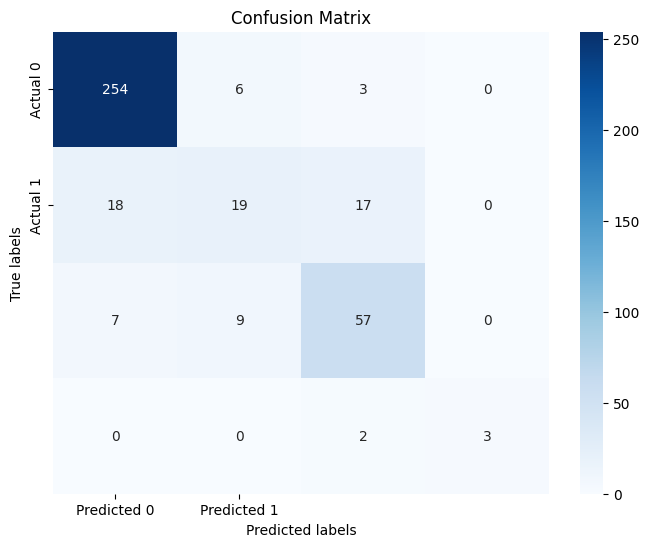

In [1271]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cm = confusion_matrix(y_test,lst_pred[6])

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lst_feature_importances[7]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


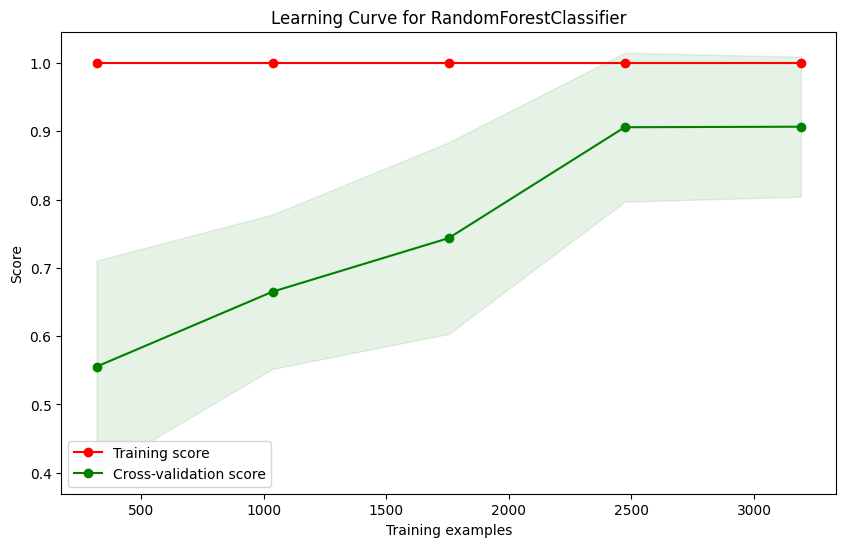

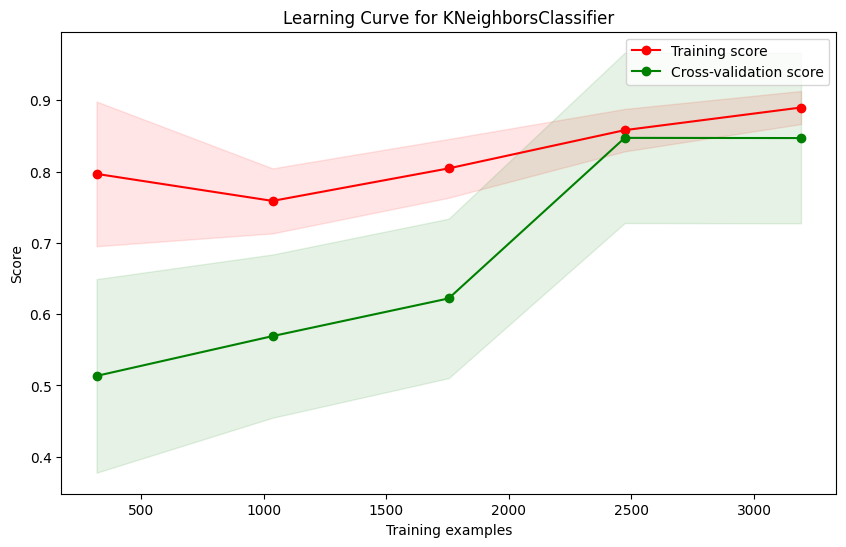

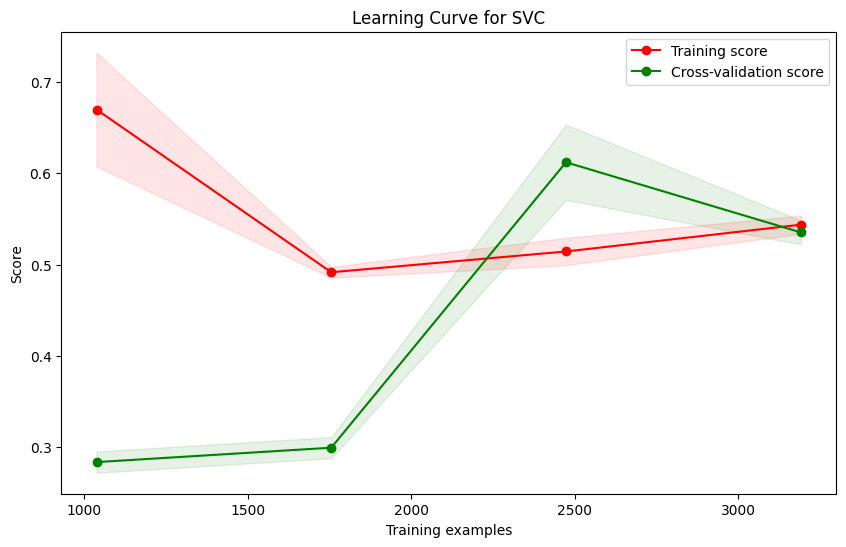

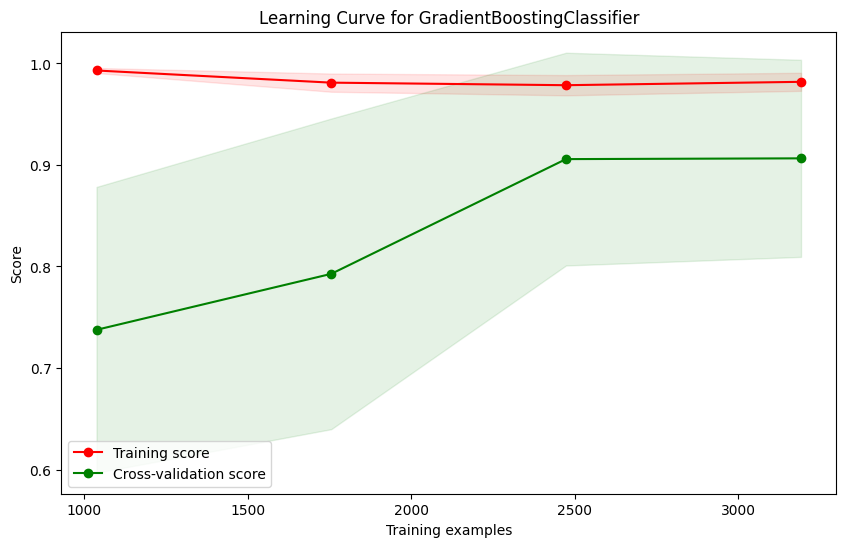

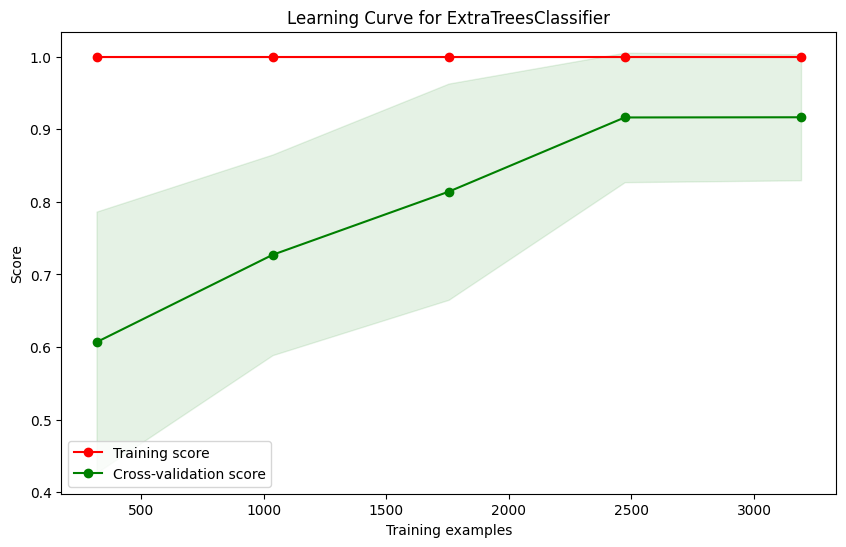

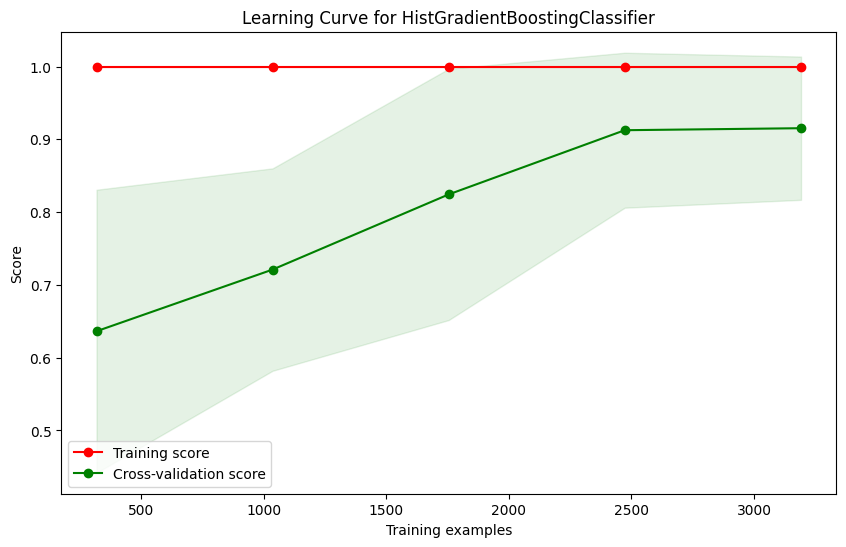

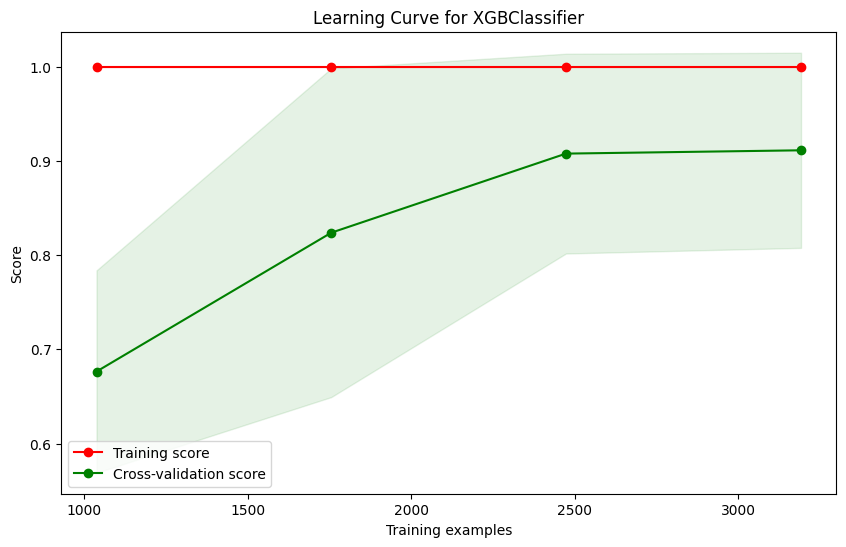

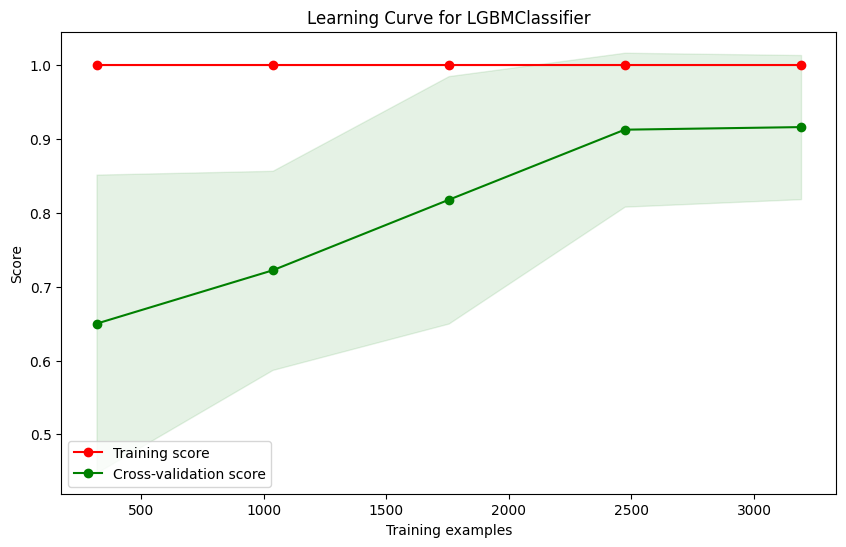

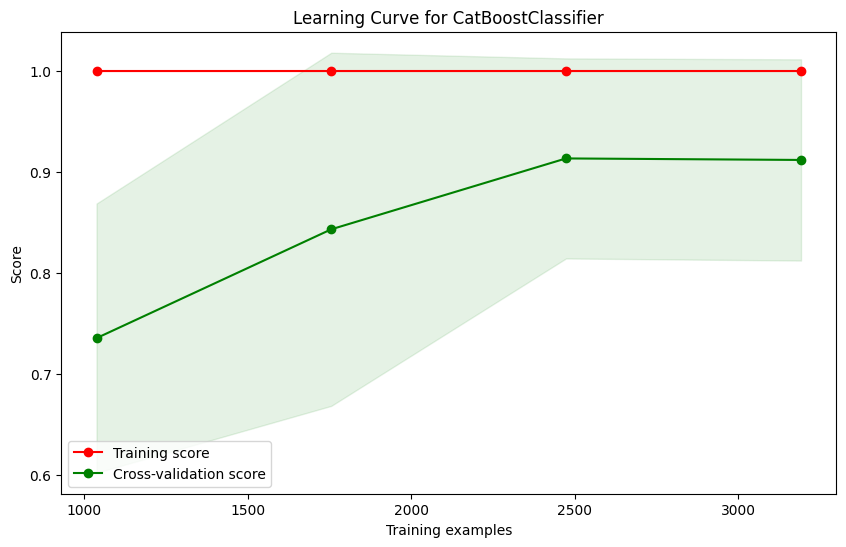

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title(f"Learning Curve for {model.__class__.__name__}")
    plt.show()

# 각 모델에 대해 학습 곡선을 그립니다.
for name, model in models.items():
    plot_learning_curve(model, X_train, y_train)